## 1. Import and Search for Matching Datasets

In this step, we import the `get_matching_datasets` function from the `nasapy` module. We define the CKAN instance URL and the specific dataset title to search for. The function `get_matching_datasets` retrieves the specified dataset and prints details of datasets that have the same observation start time.

```python
from nasapy import get_matching_datasets

catalog = 'https://ckan.geosciframe.org:8443'
specific_dataset_title = 'OR_ABI-L1b-RadC-M6C01_G18_s20231330001191_e20231330003569_c20231330004026.nc'
get_matching_datasets(catalog, specific_dataset_title)


In [12]:
# example_usage.py

from nasapy import get_matching_datasets

# Define the CKAN instance URL
catalog = 'https://ckan.geosciframe.org:8443'

# Define the specific dataset title to search for
specific_dataset_title = 'OR_ABI-L1b-RadC-M6C01_G18_s20231330001191_e20231330003569_c20231330004026.nc'

# Call the function to get and print matching datasets
get_matching_datasets(catalog, specific_dataset_title)


Details of the specified dataset: OR_ABI-L1b-RadC-M6C01_G18_s20231330001191_e20231330003569_c20231330004026.nc 

Dataset Title: OR_ABI-L1b-RadC-M6C01_G18_s20231330001191_e20231330003569_c20231330004026.nc
S3 Link: https://noaa-goes18.s3.amazonaws.com/ABI-L1b-RadC/2023/133/00/OR_ABI-L1b-RadC-M6C01_G18_s20231330001191_e20231330003569_c20231330004026.nc
Pelican Origin: http://osg-sci1.datacollaboratory.org:1094/VDC/PUBLIC/NASA/ABI-L1b-RadC/OR_ABI-L1b-RadC-M6C01_G18_s20231330001191_e20231330003569_c20231330004026.nc

Matching datasets with the same start time:

Dataset Title: OR_ABI-L2-FDCC-M6_G18_s20231330001191_e20231330003564_c20231330004181.nc
S3 Link: https://noaa-goes18.s3.amazonaws.com/ABI-L2-FDCC/2023/133/00/OR_ABI-L2-FDCC-M6_G18_s20231330001191_e20231330003564_c20231330004181.nc
Pelican Origin: http://osg-sci1.datacollaboratory.org:1094/VDC/PUBLIC/NASA/ABI-L2-FDCC/OR_ABI-L2-FDCC-M6_G18_s20231330001191_e20231330003564_c20231330004181.nc
Dataset Title: OR_ABI-L1b-RadC-M6C16_G18_s202



## 2. Filter Datasets by Time Range

We use the `print_filtered_datasets` function to filter datasets within a user-specified time range. This function searches the CKAN instance for datasets and prints details of those that fall within the provided start and end times.

```python
from datetime import datetime
from nasapy import print_filtered_datasets

catalog = 'https://ckan.geosciframe.org:8443'

# First filter attempt (expected to return no results)
user_start_time = datetime(2023, 5, 13, 0, 0, 0)
user_end_time = datetime(2023, 5, 13, 0, 1, 0)
print_filtered_datasets(catalog, user_start_time, user_end_time, query='nasa', rows=1000)

# Second filter attempt (expected to return some results)
user_start_time = datetime(2023, 5, 13, 0, 0, 0)
user_end_time = datetime(2023, 5, 13, 0, 5, 0)
print_filtered_datasets(catalog, user_start_time, user_end_time, query='nasa', rows=1000)


In [2]:
# example_usage.py

from datetime import datetime
from nasapy import print_filtered_datasets

# Define the CKAN instance URL
catalog = 'https://ckan.geosciframe.org:8443'

# Example 1: Filter datasets by time range and print details will return nothing since there are no datasets in the time range
user_start_time = datetime(2023, 5, 13, 0, 0, 0)
user_end_time = datetime(2023, 5, 13, 0, 1, 0)
print("\nFiltering datasets by time range...", user_start_time, user_end_time, "\n")
print_filtered_datasets(catalog, user_start_time, user_end_time, query='nasa', rows=1000)
# Example 2: Filter datasets by time range and print details
user_start_time = datetime(2023, 5, 13, 0, 0, 0)
user_end_time = datetime(2023, 5, 13, 0, 5, 0)
print("\nFiltering datasets by time range...", user_start_time, user_end_time, "\n")
print_filtered_datasets(catalog, user_start_time, user_end_time, query='nasa', rows=1000)



Filtering datasets by time range... 2023-05-13 00:00:00 2023-05-13 00:01:00 

All Dataset Attributes:

Filtering datasets by time range... 2023-05-13 00:00:00 2023-05-13 00:05:00 

Dataset Title: OR_ABI-L2-FDCC-M6_G18_s20231330001191_e20231330003564_c20231330004181.nc
Dataset ID: 179a40f3-2ef6-4125-9771-345bac31042b
----------------------------------------
Attributes:
  author: None
  author_email: None
  creator_user_id: b2d3bbb8-fc70-446e-b7b5-2fbdaa026495
  id: 179a40f3-2ef6-4125-9771-345bac31042b
  isopen: False
  license_id: None
  license_title: None
  maintainer: None
  maintainer_email: None
  metadata_created: 2024-05-17T06:04:27.826653
  metadata_modified: 2024-05-17T06:04:27.826657
  name: abi-l2-fdcc_2023_133_00_or_abi-l2-fdcc-m6_g18_s20231330001191_e_f36333e2-ebb5-4b24-b0dc-6ab94b1fe81e
  notes: System Environment: OR, Platform Identifier: ABI-L2-FDCC-M6, Data Short Name: G18_s20231330001191_e20231330003564, Observation Start Date & Time: 2023-05-13T00:01:19.100000, Obser



## 3. Download Matching Files

Here, we use the `download_matching_files` function to download files that match the specified dataset's observation start time. The function checks for RADC and FDCC files and downloads them from either a Pelican origin link or an S3 link, saving them to the specified download directory.

```python
from nasapy import download_matching_files

download_directory = ''
radc_path, fdcc_path = download_matching_files(catalog, specific_dataset_title, download_directory)
print(f"RADC file downloaded to: {radc_path}")
print(f"FDCC file downloaded to: {fdcc_path}")


In [19]:
from nasapy import download_matching_files
import os

# Get the current working directory
download_directory = os.getcwd()

# Example 3: Download matching files
print("\nDownloading matching files...\n")
radc_path, fdcc_path = download_matching_files(catalog, specific_dataset_title, download_directory)

# Print the paths of the downloaded files
print(f"RADC file downloaded to: {radc_path}")
print(f"FDCC file downloaded to: {fdcc_path}")




RADC file downloaded to: /uufs/chpc.utah.edu/common/home/parashar-vdc/saleem/Final_codes/OR_ABI-L1b-RadC-M6C16_G18_s20231330001191_e20231330003578_c20231330004074.nc
FDCC file downloaded to: /uufs/chpc.utah.edu/common/home/parashar-vdc/saleem/Final_codes/OR_ABI-L2-FDCC-M6_G18_s20231330001191_e20231330003564_c20231330004181.nc




## 4. Visualize the Data

In this final step, we load the downloaded RADC and FDCC files using the `xarray` library. We convert radiance data to reflectance, apply gamma adjustment, and create a mask for fire pixels. We then visualize the gamma-adjusted reflectance data with a fire detection overlay using `matplotlib`.

```python
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

Esun_Ch_02 = 663.274497
d2 = 0.3

ds_fdcc = xr.open_dataset(fdcc_path)
ds_radc = xr.open_dataset(radc_path)
radiance = np.array(ds_radc['Rad'])
mask = np.array(ds_fdcc['Mask'])

ref = (radiance * np.pi * d2) / Esun_Ch_02
ref = np.maximum(ref, 0.0)
ref = np.minimum(ref, 1.0)
ref_gamma = np.sqrt(ref)

fire_pixels = np.zeros(radiance.shape)
for i in range(len(mask)):
    for j in range(len(mask[i])):
        if mask[i][j] == 30:
            idx = (slice(2*i, 2*i+40), slice(2*j, 2*j+40))
            fire_pixels[idx] = 0.7
fire_pixels = np.ma.masked_where(fire_pixels == 0, fire_pixels)

fig, ax = plt.subplots(figsize=(10, 10), dpi=200)
im = ax.imshow(ref_gamma, vmin=0.0, vmax=1.0, cmap='Greys_r')
im2 = ax.imshow(fire_pixels, vmin=0.0, vmax=1.0, cmap='Reds', alpha=0.6)
cb = fig.colorbar(im, orientation='horizontal', ax=ax)
cb.set_ticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
cb.set_label('Reflectance')
plt.title("Radiance with Fire Detection Overlay")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


Loading files: /uufs/chpc.utah.edu/common/home/parashar-vdc/saleem/Final_codes/OR_ABI-L1b-RadC-M6C16_G18_s20231330001191_e20231330003578_c20231330004074.nc and /uufs/chpc.utah.edu/common/home/parashar-vdc/saleem/Final_codes/OR_ABI-L2-FDCC-M6_G18_s20231330001191_e20231330003564_c20231330004181.nc


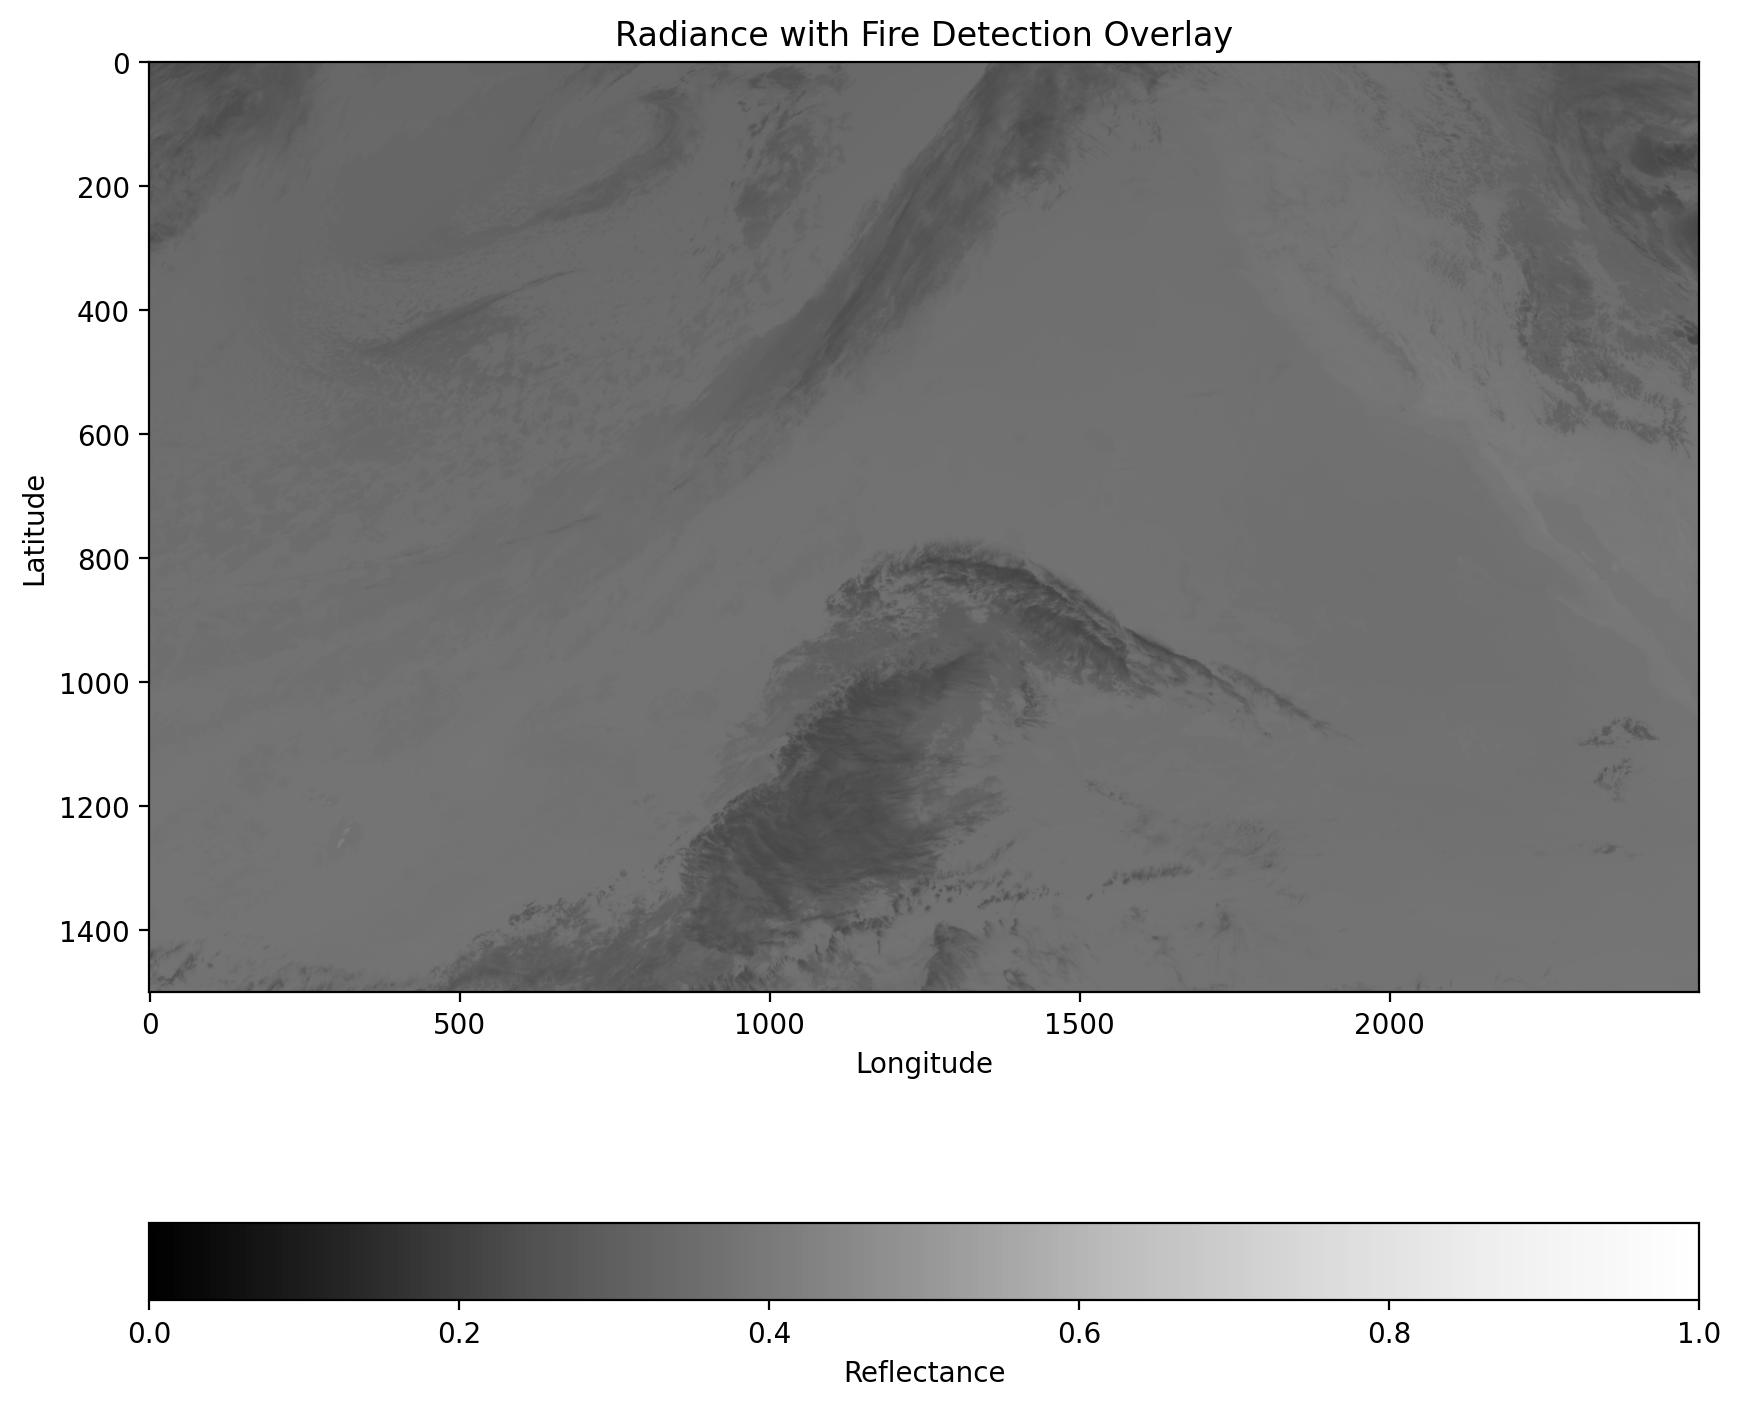

In [20]:
import os
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# Constants needed for the conversion
Esun_Ch_02 = 663.274497
d2 = 0.3


print(f"Loading files: {radc_path} and {fdcc_path}")

try:
    # Load datasets
    ds_fdcc = xr.open_dataset(fdcc_path)
    ds_radc = xr.open_dataset(radc_path)
    
    # Extract data from datasets
    radiance = np.array(ds_radc['Rad'])
    mask = np.array(ds_fdcc['Mask'])
    
    # Apply the formula to convert radiance to reflectance
    ref = (radiance * np.pi * d2) / Esun_Ch_02

    # Make sure all data is in the valid data range
    ref = np.maximum(ref, 0.0)
    ref = np.minimum(ref, 1.0)

    # Apply the formula to adjust reflectance gamma
    ref_gamma = np.sqrt(ref)
    
    # Create a mask for fire pixels
    fire_pixels = np.zeros(radiance.shape)
    for i in range(len(mask)):
        for j in range(len(mask[i])):
            if mask[i][j] == 30:
                idx = (slice(2*i, 2*i+40), slice(2*j, 2*j+40))
                fire_pixels[idx] = 0.7
    fire_pixels = np.ma.masked_where(fire_pixels == 0, fire_pixels)

    # Plot gamma adjusted reflectance with fire detection overlay
    fig, ax = plt.subplots(figsize=(10, 10), dpi=200)
    im = ax.imshow(ref_gamma, vmin=0.0, vmax=1.0, cmap='Greys_r')
    im2 = ax.imshow(fire_pixels, vmin=0.0, vmax=1.0, cmap='Reds', alpha=0.6)
    cb = fig.colorbar(im, orientation='horizontal', ax=ax)
    cb.set_ticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
    cb.set_label('Reflectance')
    plt.title("Radiance with Fire Detection Overlay")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()
except Exception as e:
    print(f"Error plotting the file: {str(e)}")

